properties of original image: 
matrix_shape (1750, 2200, 3)
resolution 1750 x 2200


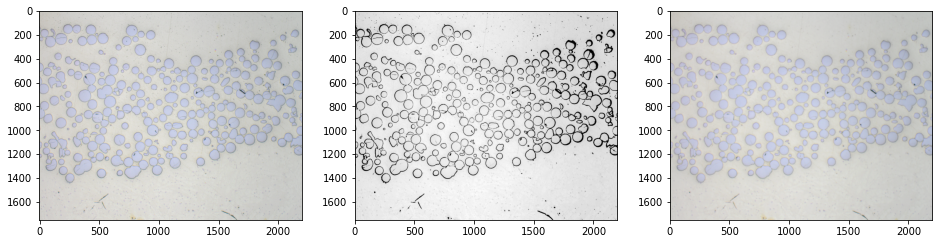

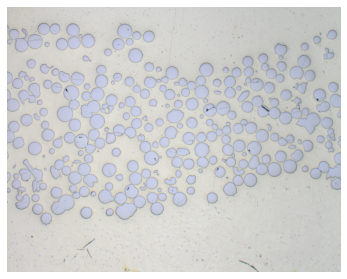

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# get image and read properties

# rgb_image = plt.imread('micrograph.tif')[:800,:800]
rgb_image = plt.imread('micrograph.tif')[:1750,:2200]

print('properties of original image: ')
print(f'matrix_shape {rgb_image.shape}')
print(f'resolution {rgb_image.shape[0]} x {rgb_image.shape[1]}')

# contrast improvement by enhancing dark pixels from the background
gray_image = cv.cvtColor(rgb_image, cv.COLOR_BGR2GRAY)
gray_image[gray_image<180]=0

# Image blurring -> image smoothing & noise removal
blured_image = cv.medianBlur(rgb_image, 9)
# blured_image = cv.bilateralFilter(rgb_image, 5,50,50)


fig, ax= plt.subplots(1,3,figsize=[16,4])    
ax[0].imshow(rgb_image)
ax[1].imshow(gray_image,cmap='gray')
ax[2].imshow(blured_image)

plt.figure()
plt.imshow(rgb_image)
plt.tight_layout(pad=0.1)
plt.axis('off')
plt.savefig('input_image.png',dpi=300)

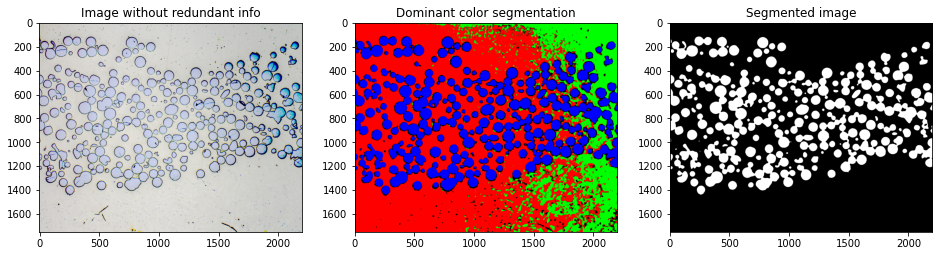

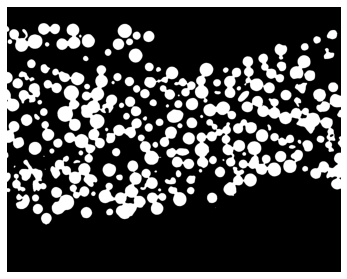

In [111]:
modified_image = np.copy(rgb_image)
modified_image[modified_image<=175] = 0
fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].set_title('Image without redundant info')
ax[0].imshow(modified_image)

flatten_image = rgb_image.reshape(-1,3)
flatten_color_segmented_image = np.zeros_like(flatten_image)
idx = np.argmax(flatten_image,axis=1)
flatten_color_segmented_image[idx==0]=[255,0,0]
flatten_color_segmented_image[idx==1]=[0,255,0]
flatten_color_segmented_image[idx==2]=[0,0,255]
color_segmented_image = flatten_color_segmented_image.reshape(rgb_image.shape)

kernel_size = 17
color_segmented_image = cv.medianBlur(color_segmented_image,kernel_size)
ax[1].set_title('Dominant color segmentation')
ax[1].imshow(color_segmented_image)

binary_image = cv.cvtColor(color_segmented_image,cv.COLOR_RGB2GRAY)
rng = (binary_image>15) & (binary_image<30)
binary_image[rng]=1
binary_image[~rng]=0
ax[2].set_title('Segmented image')
ax[2].imshow(binary_image,cmap="gray")


plt.figure()
plt.imshow(binary_image,cmap="gray")
plt.tight_layout(pad=0.1)
plt.axis('off')
plt.savefig('binary_image.png',dpi=300)

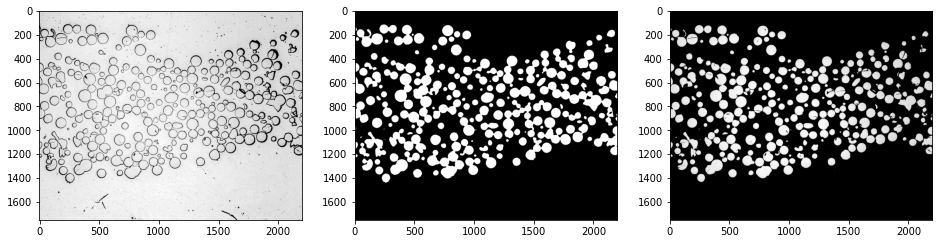

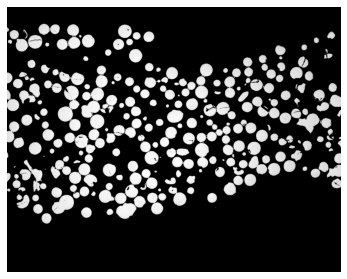

In [116]:
fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].imshow(gray_image,cmap="gray")
ax[1].imshow(binary_image,cmap="gray")
ax[2].imshow(binary_image * gray_image,cmap="gray")
# ax[2].imshow(binary_image[:,:,None] * rgb_image)

plt.figure()
plt.imshow(binary_image * gray_image,cmap="gray")
plt.tight_layout(pad=0.1)
plt.axis('off')
plt.savefig('mask_overlay.png',dpi=300)

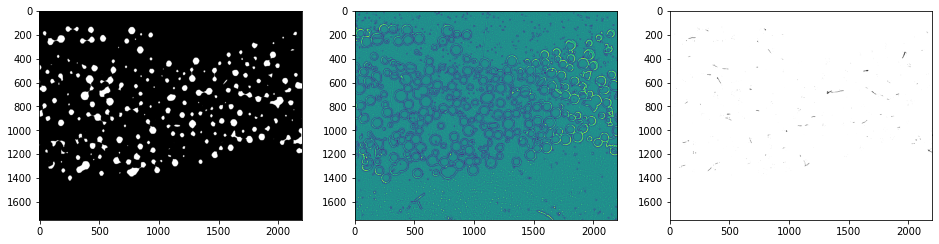

In [113]:
fig, ax= plt.subplots(1,3,figsize=[16,4])

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
binary_image_eroded = cv.morphologyEx(binary_image, cv.MORPH_ERODE, kernel, iterations=8)
ax[0].imshow(binary_image_eroded,cmap="gray")


laplacian = cv.Laplacian(gray_image,cv.CV_16S,ksize=9)
ax[1].imshow(laplacian)

cracks_image=laplacian*binary_image_eroded
ax[2].imshow(cracks_image,cmap="gray")

rng = (cracks_image<15e3) 
cracks_image[rng]=255
cracks_image[~rng]=0
ax[2].imshow(cracks_image,cmap="gray")

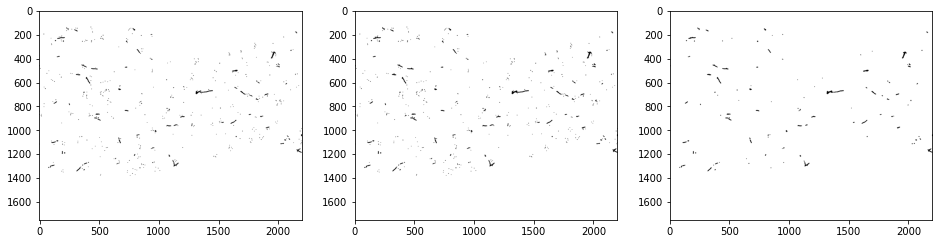

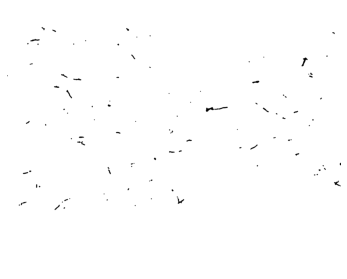

In [114]:
fig, ax= plt.subplots(1,3,figsize=[16,4])


n=5
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(n,n))

dialated = cv.morphologyEx(cracks_image, cv.MORPH_ERODE, kernel, iterations=1)
ax[0].imshow(dialated,cmap="gray")

opened = cv.morphologyEx(dialated, cv.MORPH_OPEN, kernel, iterations=2)
ax[1].imshow(opened,cmap="gray")

n=3
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(n,n))
closed = cv.morphologyEx(opened, cv.MORPH_CLOSE, kernel, iterations=3)
ax[2].imshow(closed,cmap="gray")

# n=8
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(n,n))
# closed = cv.morphologyEx(closed, cv.MORPH_CLOSE, kernel, iterations=1)
# ax[2].imshow(closed,cmap="gray")

plt.figure()
plt.imshow(closed,cmap="gray")
plt.tight_layout(pad=0.1)
plt.axis('off')
plt.savefig('extracted_cracks.png',dpi=300)

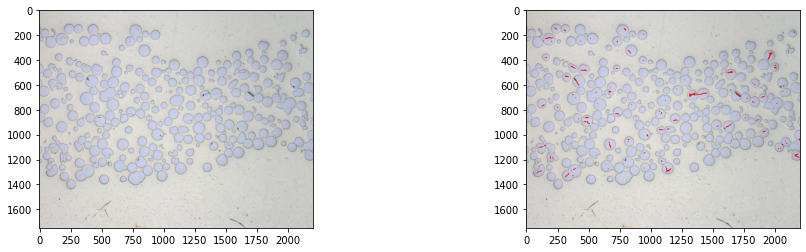

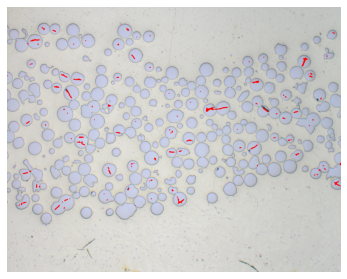

In [115]:
fig, ax= plt.subplots(1,2,figsize=[16,4])
ax[0].imshow(rgb_image)

rgb_cracks = np.copy(rgb_image)
rgb_cracks[closed[:,:]==0]=[255,0,0]
ax[1].imshow(rgb_cracks)
fig.savefig('outfile.pdf',dpi=400)

plt.figure()
plt.imshow(rgb_cracks,cmap="gray")
plt.tight_layout(pad=0.1)
plt.axis('off')
plt.savefig('image_with_cracks.png',dpi=300)